In [1]:
import session_info
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from tabulate import tabulate as tab
from sklearn.linear_model import LinearRegression

In [31]:
session_info.show()

# Problem 1: Programming

Consider a box with three balls, each with a different value: ball A is worth 2
points, ball B is worth 3 points and ball C is worth 4 points. Write a function that
calculates the number of different ways of reaching a total sum of N points by
extracting from the box one ball at a time, taking into account the order in which the
balls are drawn.

For example, for N=6 you have 4 different possibilities:

    ● Taking ball B twice in a row → 3 + 3 = 6 points
    ● Taking ball A three times in a row → 2 + 2 + 2 = 6 points
    ● Taking ball A, then ball C → 2 + 4 = 6 points
    ● Taking ball C, then ball A → 4 + 2 = 6 points

Your function must receive the target number of points N as a parameter and
return the number of different ways of getting to that number. Make the function as
efficient as possible and discuss its computational complexity.

## Solution

To solve the problem we have to find all the solutions to the linear diophantine equation 

$$2a+3b+3c = N , (a,b,c)\in \mathbb N^3, $$ 

and then for each solution compute all the possible ways of ordering the balls. 

We present the solution in three steps:

### Step 1

We define a function __diof__ that finds all the solutions to the equation 

$$2a+3b+4c = N , (a,b,c)\in \mathbb N^3. $$

If $(a,b,c)$ is a solution, by elementary computations $2a, 3b , 4c \leq N$ implying that $a$ is upperly bounded by $N/2$, $b$ by $N/3$, and $c$ by $N/4$.

The function computes the quantity $2a+3b+4c$ at the founded intervals and checks if the equation is satisfied. All the  solutions are added into a tuple and returned in a list.

In [3]:
def diof(N):
    
    sol =[]

    for a in range(N // 2+1):
        for b in range(N // 3+1):
            for c in range (N // 4+1):
                if 2*a + 3*b + 4*c == N:
                    sol.append((a,b,c))
    
    return sol

As an example we compute the solutions of the equation $$2a+3b+4c = 10 , (a,b,c)\in \mathbb N^3. $$

In [4]:
diof(10)

[(0, 2, 1), (1, 0, 2), (2, 2, 0), (3, 0, 1), (5, 0, 0)]

Implying that $2\cdot3+4\cdot1$, $2\cdot 1+4\cdot2$, $2\cdot2+3\cdot 2$, $2\cdot3+4\cdot1$ and $2\cdot5$ are the solutions.

### Step 2

We define a lambda function __comb__ which receives a tuple (a,b,c) (corresponding to the solution 2a+3b+4c=N) and computes all the possible ways of expressing the sum in different orders according to the values of the balls. It is an elemental combinatorics problem to proof that the number of combinations corresponding to the tuple are

$$\binom{a+b+c}{a}\cdot\binom{b+c}{b}=\frac{(a+b+c)!}{a!b!c!} $$

In [5]:
comb = lambda t: int(math.factorial(t[0]+t[1]+t[2])/(math.factorial(t[0])*math.factorial(t[1])*math.factorial(t[2])))

We compute the number of combinations generated by the tuple $(0,2,1)$ which corresponds to the solution $2\cdot3+ 4\cdot 1 = 10. $

In [6]:
comb((0,2,1))

3

### Step 3

We define the function __f__ which solves the problem by ways of the functions __diof__ and __comb__. __f__ takes all the tuples generated by __diof__ and computes all the possible combinations that can be done by each tuple with __comp__. We arrive to the solution by adding all the possible combinations associated to each tuple. 

In [7]:
def f(N):
    n = 0
    for i in diof(N):
        n += comb(i)
    return int(n)

We compute __f__ for N= 0, 1, 2,... 9:

In [8]:
for j in range(10):
    print(f(j))

1
0
1
1
2
2
4
5
8
11


## Discussion about the computational complexity

__diof__ has a computational complexity of order $O(N^3)$ since it checks the validy of $\frac{N}{2}\times\frac{N}{3}\times\frac{N}{4}$ equations. An interesting question to answer is how far is the algorithm of being optimal, research of similar problems have been subject of study in the past. A first step to try to get a more efficent algorithm could be inspired by: https://doi.org/10.1007/s10559-006-0050-2.

The study of the computational complexity of __comb__ is technically harder and goes besides our knowledge.

# Problem 2: Demand Estimation

The sales of two companies, Company 1 and Company 2, in two regions,
Region 1 and Region 2, are provided here. The description of the only three columns
are:

    ● Sales_U → Sales in equivalent units (lbs)
    ● Sales_USD → Sales in $
    ● date → starting date for the week


● Construct time-series plots of sales and prices for Company 1 in Region 1 and 2. Repeat the exercise for Company 2. Describe the differences or similarities between Company 1 and 2 pricing policies.

In [9]:
# load the data to a pandas dataframe
R1_C1 = pd.read_csv("region1_company1.csv")
R2_C1 = pd.read_csv("region2_company1.csv")
R1_C2 = pd.read_csv("region1_company2.csv")
R2_C2 = pd.read_csv("region2_company2.csv")

In [10]:
# check that the data is free of missing values
R1_C1.info()
print("\n")
R2_C1.info()
print("\n")
R1_C2.info()
print("\n")
R2_C2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sales_U    104 non-null    int64 
 1   Sales_USD  104 non-null    int64 
 2   Date       104 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sales_U    104 non-null    int64 
 1   Sales_USD  104 non-null    int64 
 2   Date       104 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sales_U    104 non-null    int64 
 1   Sales_USD  104 non-null    int64 
 2   Date       104 non-null    object

In [11]:
#add a column with the price 
R1_C1["Price_USD"] = R1_C1["Sales_USD"]/R1_C1["Sales_U"]
R2_C1["Price_USD"] = R2_C1["Sales_USD"]/R2_C1["Sales_U"]
R1_C2["Price_USD"] = R1_C2["Sales_USD"]/R1_C2["Sales_U"]
R2_C2["Price_USD"] = R2_C2["Sales_USD"]/R2_C2["Sales_U"]

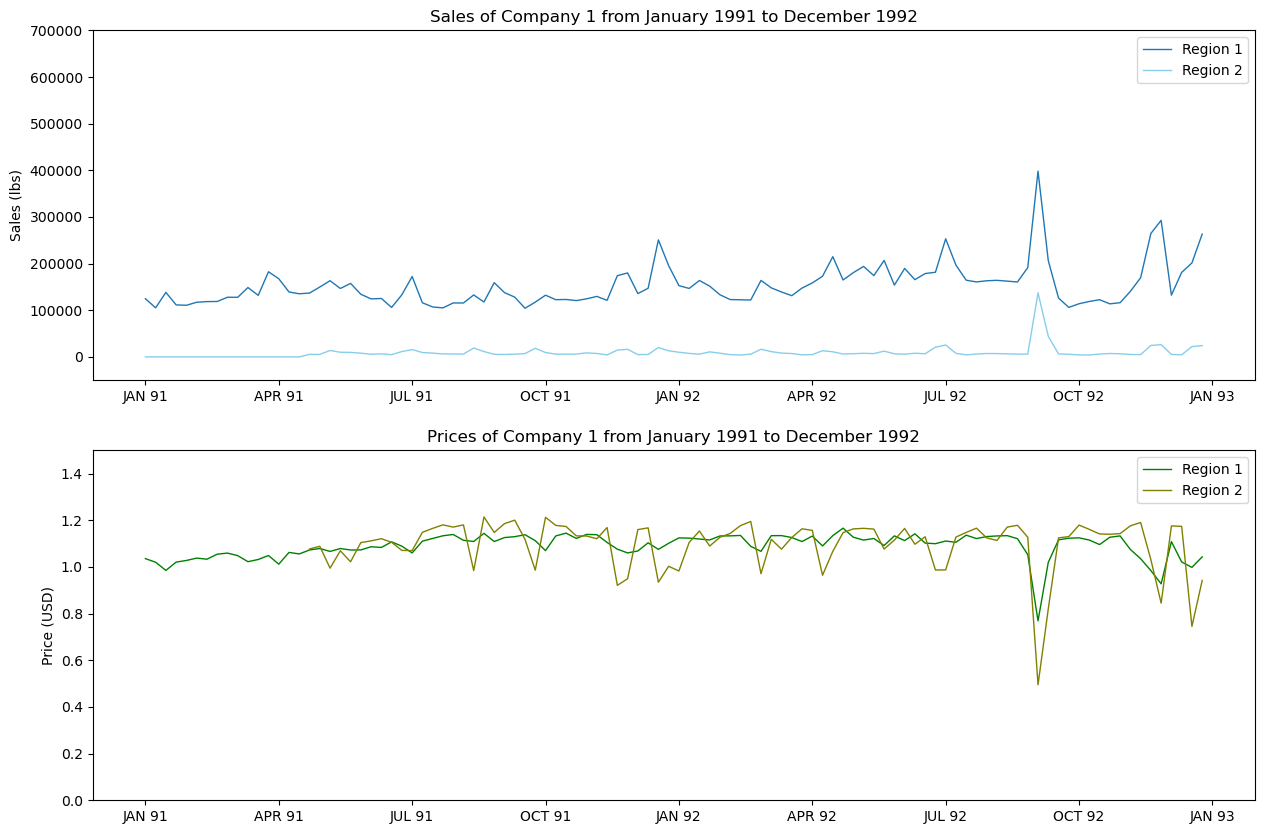

In [12]:
#time series plot with the sales and prices of Company 1
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,10))

#plot of the sales
ax1.set_title("Sales of Company 1 from January 1991 to December 1992")


ax1.plot(R1_C1["Sales_U"],label="Region 1",linewidth=1)
ax1.plot(R2_C1["Sales_U"],label="Region 2", linewidth=1,color = 'skyblue')
ax1.legend(loc="upper right")

ax1.set_xticks(ticks=[0,13,26,39,52,65,78,91,104],
               labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])

ax1.set_ylabel("Sales (lbs)")
ax1.set_ylim(-50000,700000)

#plot of the prices
ax2.set_title("Prices of Company 1 from January 1991 to December 1992")

ax2.plot(R1_C1["Price_USD"],label="Region 1" , color ='green',linewidth=1)
ax2.plot(R2_C1["Price_USD"],label="Region 2",linewidth=1 , color ='olive')
ax2.legend(loc="upper right")

ax2.set_xticks(ticks=[0,13,26,39,52,65,78,91,104],
               labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])

ax2.set_ylabel("Price (USD)")
ax2.set_ylim(0,1.5)

plt.show()

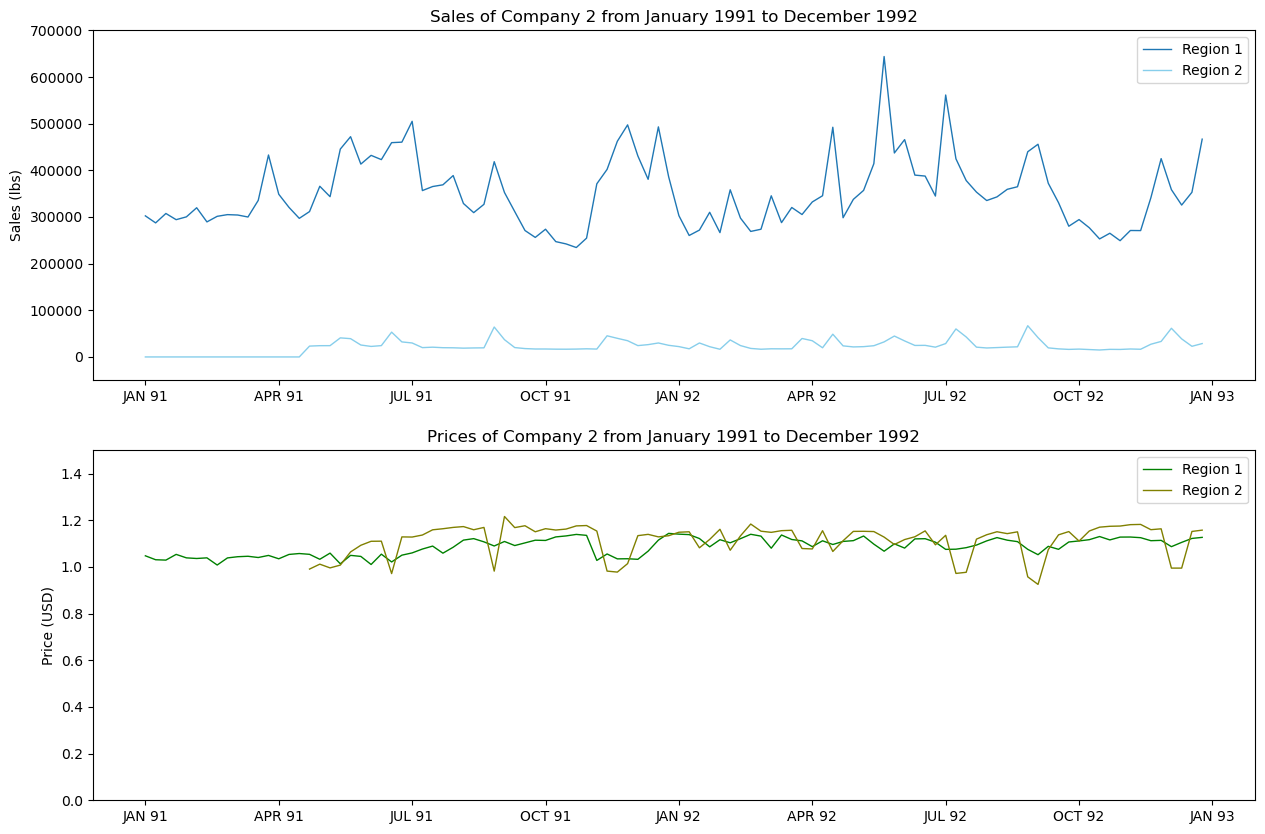

In [13]:
#time series plot with the sales and prices of Company 2
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,10))

#plot of the sales
ax1.set_title("Sales of Company 2 from January 1991 to December 1992")

ax1.plot(R1_C2["Sales_U"],label="Region 1",linewidth=1)
ax1.plot(R2_C2["Sales_U"],label="Region 2", linewidth=1,color = 'skyblue')
ax1.legend(loc="upper right")

ax1.set_xticks(ticks=[0,13,26,39,52,65,78,91,104],
               labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])

ax1.set_ylabel("Sales (lbs)")
ax1.set_ylim(-50000,700000)

#plot of the prices
ax2.set_title("Prices of Company 2 from January 1991 to December 1992")

ax2.plot(R1_C2["Price_USD"],label="Region 1" , color ='green',linewidth=1)
ax2.plot(R2_C2["Price_USD"],label="Region 2",linewidth=1 , color ='olive')
ax2.legend(loc="upper right")

ax2.set_xticks(ticks=[0,13,26,39,52,65,78,91,104],
               labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])

ax2.set_ylabel("Price (USD)")
ax2.set_ylim(0,1.5)

plt.show()

We plot the prices evolution from Company 1 and Company 2 for the comparative analysis:

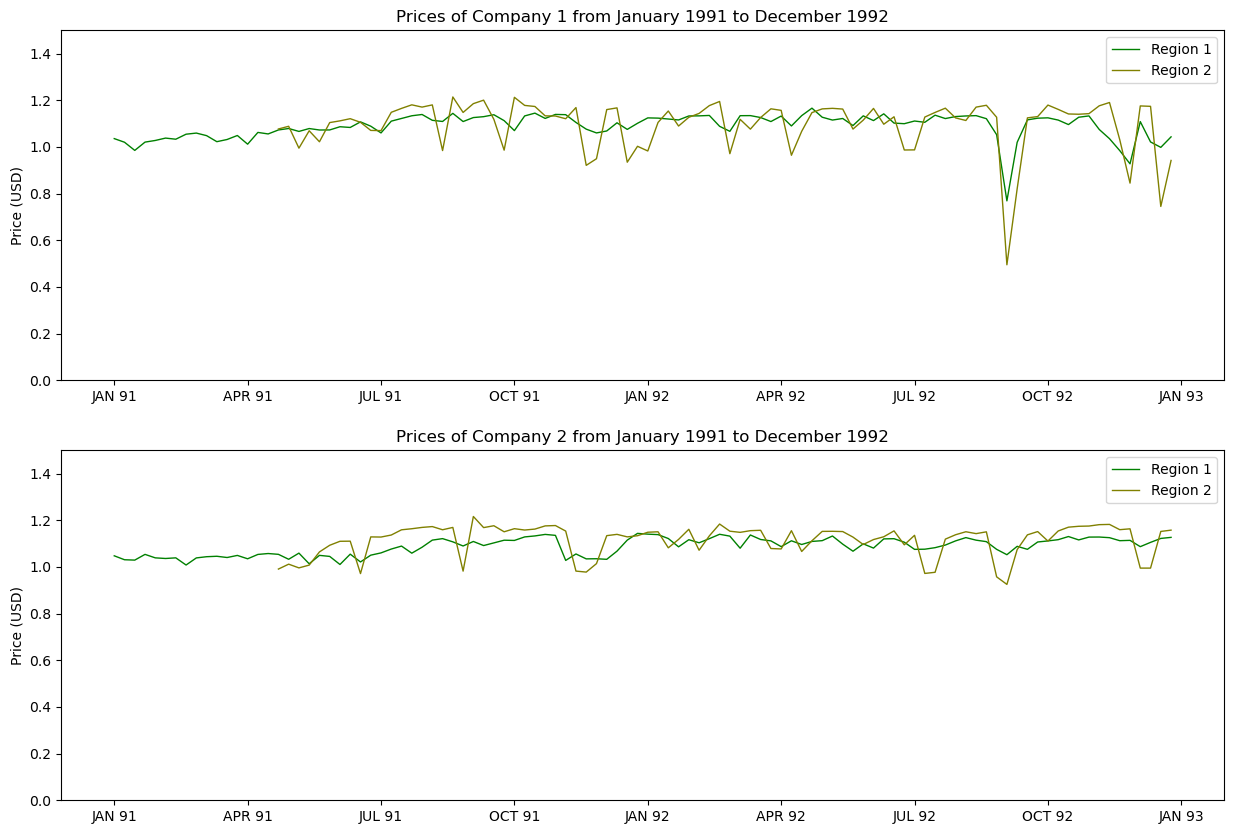

In [14]:
#time series plot with the prices of Company 1 and Company 2

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,10))

#plot of Company 1
ax1.set_title("Prices of Company 1 from January 1991 to December 1992")

ax1.plot(R1_C1["Price_USD"],label="Region 1" , color ='green',linewidth=1)
ax1.plot(R2_C1["Price_USD"],label="Region 2",linewidth=1 , color ='olive')
ax1.legend(loc="upper right")

ax1.set_xticks(ticks=[0,13,26,39,52,65,78,91,104],
               labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])

ax1.set_ylabel("Price (USD)")
ax1.set_ylim(0,1.5)

#plot of Company 2
ax2.set_title("Prices of Company 2 from January 1991 to December 1992")

ax2.plot(R1_C2["Price_USD"],label="Region 1" , color ='green',linewidth=1)
ax2.plot(R2_C2["Price_USD"],label="Region 2",linewidth=1 , color ='olive')
ax2.legend(loc="upper right")

ax2.set_xticks(ticks=[0,13,26,39,52,65,78,91,104],
               labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])

ax2.set_ylabel("Price (USD)")
ax2.set_ylim(0,1.5)

plt.show()

All the prices series have a relatively stable oscillation near 1 USD. The oscillations are higher in Region 1 than in Region 2. Both companies started to sell the product at Region 1 on January 1991 and at Region 2 in April 91 (approximatelly).

The price variation is higher in Company 1 than in Company 2 this is more evident near the end of the time series, where the prices from Company 1 start to exhibit  more inestability.

● Construct scatter-plots of sales versus prices for Company 1 in Region 1 and Region 2 separately. Repeat the exercise for Company 2. Is there evidence for a negatively sloped demand-curve in the data? Eye-balling these plots, does demand appear more elastic in Region 1 or 2?

In [15]:
#generate new dataframes to analyze the demand curve 


#new dataframe for Company 1 at Region 1 without the dates and sorted according to the sales magnitude
r1_c1 = R1_C1.drop(columns="Date")
r1_c1.sort_values('Sales_U',ignore_index=True ,inplace =True)

#new dataframe for Company 1 at Region 2 we delete the rows with null values corresponding to the beginning of the time series
#when the price and demand where zero
r2_c1 = R2_C1.drop(columns="Date")
r2_c1.dropna(inplace=True)
r2_c1.sort_values('Sales_U',ignore_index=True ,inplace =True)


#similar proceedure for Company 2
r1_c2 = R1_C2.drop(columns="Date")
r1_c2.sort_values('Sales_U',ignore_index=True ,inplace =True)

r2_c2 = R2_C2.drop(columns="Date")
r2_c2.sort_values('Sales_U',ignore_index=True ,inplace =True)
r2_c2.dropna(inplace=True)

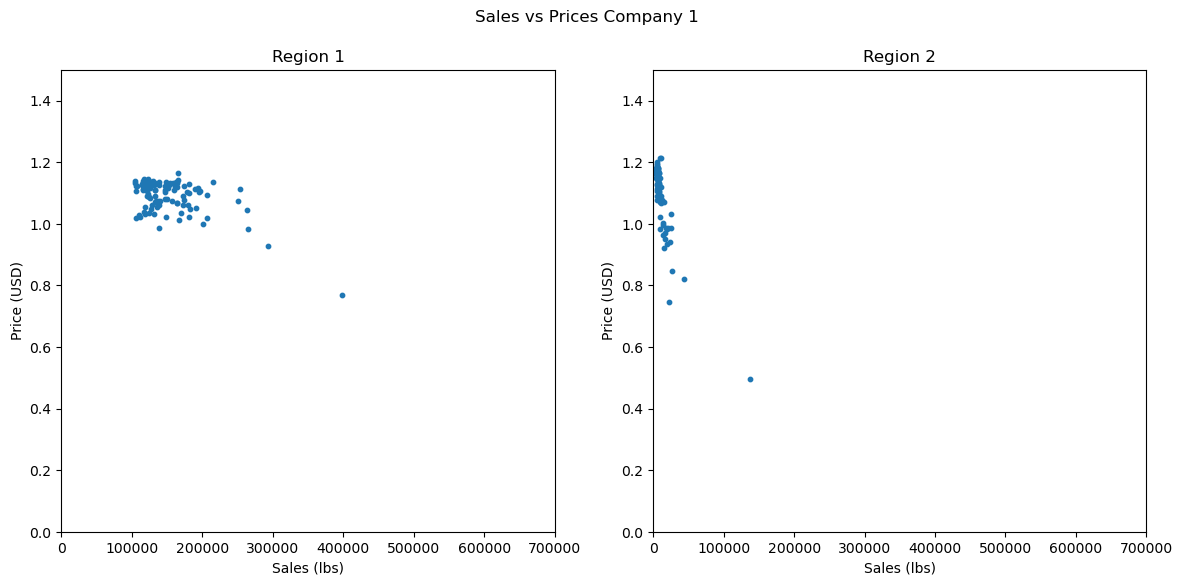

In [16]:
#scatter plot of sales vs prices from Company 1
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6) ,sharex=True)
fig.suptitle("Sales vs Prices Company 1")

#plot region 1
ax1.set_title("Region 1")
ax1.scatter(r1_c1["Sales_U"],r1_c1["Price_USD"],s=10)
ax1.set_xlim(0,700000)
ax1.set_ylim(0,1.5)
ax1.set_xlabel("Sales (lbs)")
ax1.set_ylabel("Price (USD)")

#plot region 2
ax2.set_title("Region 2")
ax2.scatter(r2_c1["Sales_U"],r2_c1["Price_USD"],s=10)
ax2.set_ylim(0,1.5)
ax2.set_xlabel("Sales (lbs)")
ax2.set_ylabel("Price (USD)")

plt.show()

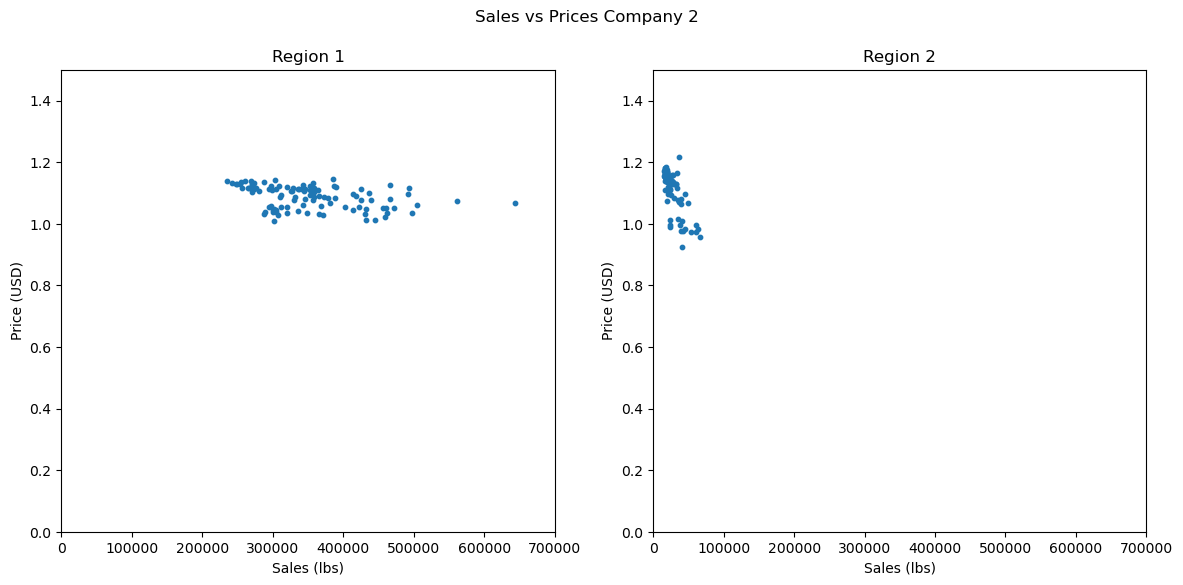

In [17]:
#scatter plot of sales vs prices from Company 2
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6) ,sharex=True)
fig.suptitle("Sales vs Prices Company 2")

#plot region 1
ax1.set_title("Region 1")
ax1.scatter(r1_c2["Sales_U"],r1_c2["Price_USD"],s=10)
ax1.set_xlim(0,700000)
ax1.set_ylim(0,1.5)
ax1.set_xlabel("Sales (lbs)")
ax1.set_ylabel("Price (USD)")

#plot region 2
ax2.set_title("Region 2")
ax2.scatter(r2_c2["Sales_U"],r2_c2["Price_USD"],s=10)
ax2.set_ylim(0,1.5)
ax2.set_xlabel("Sales (lbs)")
ax2.set_ylabel("Price (USD)")

plt.show()

We assume that the demand curve follows a linear regression model $y =\alpha +\beta x +\varepsilon$ and conduct an hypothesis test for the sign of the slope. Under such assumptions $$\beta =\frac{r \sqrt{n-2} }{\sqrt{1 -r^2}}\sim t(n-2), $$
where $r$ denotes the Pearson's correlation coeficient and $t(n-2)$ is the Student's $t$ distribution with $n-2$ degrees of freedom.

We can find evidence for the negativity of the slope by means of the one sided hypothesis test

$$H_0: \beta \geq 0 $$
$$H_1: \beta < 0 $$

The rejection of the the null hypothesis implies strong evidence for the slope to being negative. As usual we choose a $p$-value of $.05$.

In [18]:
#test for the negativity of the slope of the demand curve at Company 1 Region 1

#compute the parameters
n11 = len(r1_c1["Sales_U"])
r11 = scipy.stats.pearsonr(r1_c1["Sales_U"],r1_c1["Price_USD"])[0]

#compute the statistic
T11 = r11*math.sqrt((n11-2)/(1-r11**2))

#compute the critical value for the acceptance region
t11 = scipy.stats.t.ppf(.05, n11-2)

#determine if the null hypothesis is accepted or rejected
if T11 >= t11:
    print("There is not enough evidence supporting that the slope is negative")

elif T11 < t11:    
    print("There is strong evidence supporting that the slope is negative")

There is strong evidence supporting that the slope is negative


In [19]:
#test for the negativity of the slope of the demand curve at Company 1 Region 2
n21 = len(r2_c1["Sales_U"])
r21 = scipy.stats.pearsonr(r2_c1["Sales_U"],r2_c1["Price_USD"])[0]

T21 = r21*math.sqrt((n21-2)/(1-r21**2))

t21 = scipy.stats.t.ppf(.05, n21-2)

if T21 >= t21:
    print("There is not enough evidence supporting that the slope is negative")

elif T21 < t21:
    print("There is strong evidence supporting that the slope is negative")

There is strong evidence supporting that the slope is negative


In [20]:
#test for the negativity of the slope of the demand curve at Company 2 Region 1
n12 = len(r1_c2["Sales_U"])
r12 = scipy.stats.pearsonr(r1_c2["Sales_U"], r1_c2["Price_USD"])[0]

T12 = r12*math.sqrt((n12-2)/(1-r12**2))

t12 = scipy.stats.t.ppf(.05, n12-2)

if T12 >= t12:
    
    print("There is not enough evidence supporting that the slope is negative")

elif T12 < t12:
    
    print("There is strong evidence supporting that the slope is negative")

There is strong evidence supporting that the slope is negative


In [21]:
#test for the negativity of the slope of the demand curve at Company 2 Region 2
n22 = len(r2_c2["Sales_U"])
r22 = scipy.stats.pearsonr(r2_c2["Sales_U"], r2_c2["Price_USD"])[0]

T22 = r22*math.sqrt((n22-2)/(1-r22**2))

t22 = scipy.stats.t.ppf(.05, n22-2)

if T22 >= t22:
    
    print("There is not enough evidence supporting that the slope is negative")

elif T22 < t22:
    
    print("There is strong evidence supporting that the slope is negative")

There is strong evidence supporting that the slope is negative


There is strong evidence supporting that the slope of the demand curve is negative in the four cases.

In both companies the curve of the demand in Region 1 tends to be horizontal, and in Region 2 tends to be vertical. This  behavior suggests that the demand is more elastic in Region 1 than in Region 2.

● Estimate the price elasticity of demand for Company 1 and 2 at Region 1 and 2 (four different demand models). Is the demand elasticity higher (in absolute magnitude) in Region 1 or 2?

We assume that the demand curve follows a contant price elasticity model meaning that $P = AQ^{1/k} $ where $Q$ is the demanded quantity, $P$ its price, $A$ the price of the product when $Q=1$ and $k$ the price elasticity.  Such equation is equivalent to $\log P = \log A+ \frac{1}{k}\log Q$, thus for estimating the parameter $k$ (and $A$) we run a linear regression model over the logarithms of the sales and the prices.

In [22]:
# assign new columns with the logarithm of the sales and prices
r1_c1["log_Sales_U"] = np.log(r1_c1["Sales_U"])
r1_c1["log_Price_USD"] = np.log(r1_c1["Price_USD"])

r2_c1["log_Sales_U"] = np.log(r2_c1["Sales_U"])
r2_c1["log_Price_USD"] = np.log(r2_c1["Price_USD"])

r1_c2["log_Sales_U"] = np.log(r1_c2["Sales_U"])
r1_c2["log_Price_USD"] = np.log(r1_c2["Price_USD"])

r2_c2["log_Sales_U"] = np.log(r2_c2["Sales_U"])
r2_c2["log_Price_USD"] = np.log(r2_c2["Price_USD"])


# fit the linear regression model and get the values of the slope m and the y-intercept of the line

#Company 1 Region 1
x11 = np.array(r1_c1["log_Sales_U"]).reshape(-1,1)
y11 = np.array(r1_c1["log_Price_USD"]).reshape(-1,1)
lm11 = LinearRegression().fit(x11, y11)
m11 = lm11.coef_[0][0]
b11 = lm11.intercept_[0]

#Company 1 Region 2
x21 = np.array(r2_c1["log_Sales_U"]).reshape(-1,1)
y21 = np.array(r2_c1["log_Price_USD"]).reshape(-1,1)
lm21 = LinearRegression().fit(x21, y21)
m21 = lm21.coef_[0][0]
b21 = lm21.intercept_[0]

#Company 2 Region 1
x12 = np.array(r1_c2["log_Sales_U"]).reshape(-1,1)
y12 = np.array(r1_c2["log_Price_USD"]).reshape(-1,1)
lm12 = LinearRegression().fit(x12, y12)
m12 = lm12.coef_[0][0]
b12 = lm12.intercept_[0]

#Company 2 Region 2
x22 = np.array(r2_c2["log_Sales_U"]).reshape(-1,1)
y22 = np.array(r2_c2["log_Price_USD"]).reshape(-1,1)
lm22 = LinearRegression().fit(x22, y22)
m22 = lm22.coef_[0][0]
b22 = lm22.intercept_[0]


#compute k and A
k11, A11 = (m11)**(-1), np.exp(b11)
k21, A21 = (m21)**(-1), np.exp(b21)
k12, A12 = (m12)**(-1), np.exp(b12)
k22, A22 = (m22)**(-1), np.exp(b22)

We present a table with the estimated elasticity values: 

In [23]:
col_names = ["","Region 1", "Region 2"]
data = [["Company 1",k11, k21], ["Company 2",k12, k22] ]
  
print(tab(data, headers=col_names))

             Region 1    Region 2
---------  ----------  ----------
Company 1     -9.8838    -5.49479
Company 2    -15.4046    -7.99822


The demand is more elastic at Region 1 compared with Region 2 in both companies. In the four models $k<-1$ implying that the demand is elastic ($-1<k<0$ would imply that the demand is inelastic).

We plot again the Sales vs Prices scatter plot drawing the demand curve that was result of the regression.

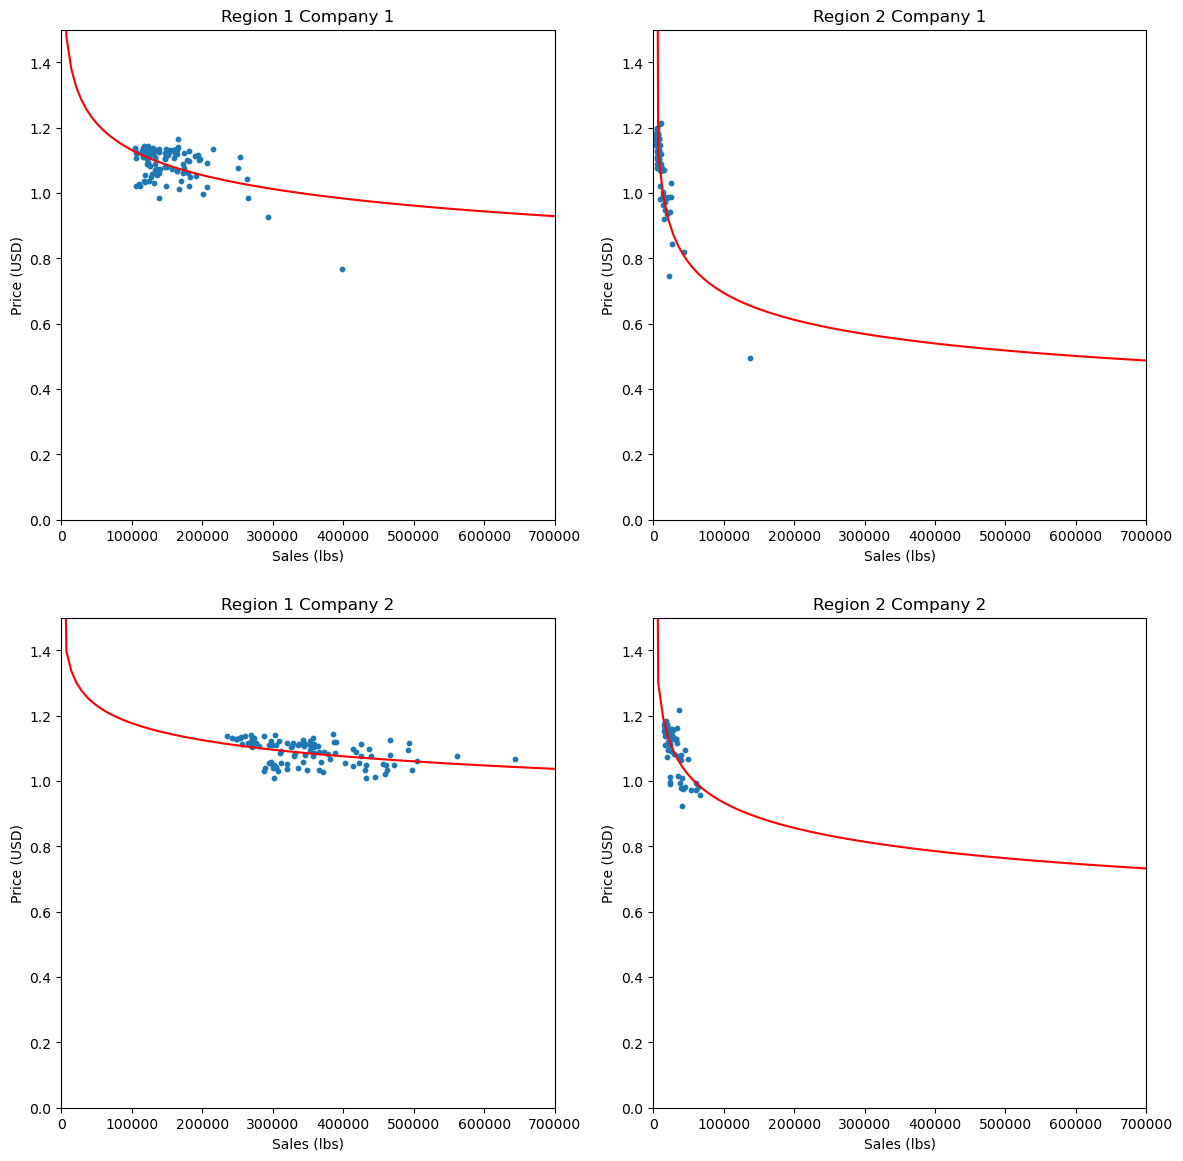

In [24]:
xseq = np.linspace(1, 700000, num=100)

fig, ((ax11, ax21),(ax12,ax22)) = plt.subplots(2, 2,figsize=(14,14))


#plot of the demand curve at Region 1 Company 1
ax11.scatter(r1_c1["Sales_U"],r1_c1["Price_USD"],s=10)
ax11.plot(xseq, A11 * (xseq**(k11**(-1))) , color="red")

ax11.set_xlim(0,700000)
ax11.set_ylim(0,1.5)

ax11.set_title("Region 1 Company 1")
ax11.set_xlabel("Sales (lbs)")
ax11.set_ylabel("Price (USD)")


#plot of the demand curve at Region 2 Company 1
ax21.scatter(r2_c1["Sales_U"],r2_c1["Price_USD"],s=10)
ax21.plot(xseq, A21 * (xseq**(k21**(-1))) , color="red")

ax21.set_xlim(0,700000)
ax21.set_ylim(0,1.5)

ax21.set_title("Region 2 Company 1")
ax21.set_xlabel("Sales (lbs)")
ax21.set_ylabel("Price (USD)")


#plot of the demand curve at Region 1 Company 2
ax12.scatter(r1_c2["Sales_U"],r1_c2["Price_USD"],s=10)
ax12.plot(xseq, A12 * (xseq**(k12**(-1))) , color="red")

ax12.set_xlim(0,700000)
ax12.set_ylim(0,1.5)

ax12.set_title("Region 1 Company 2")
ax12.set_xlabel("Sales (lbs)")
ax12.set_ylabel("Price (USD)")


#plot of the demand curve at Region 2 Company 2
ax22.scatter(r2_c2["Sales_U"],r2_c2["Price_USD"],s=10)
ax22.plot(xseq, A22 * (xseq**(k22**(-1))) , color="red")

ax22.set_xlim(0,700000)
ax22.set_ylim(0,1.5)

ax22.set_title("Region 2 Company 2")
ax22.set_xlabel("Sales (lbs)")
ax22.set_ylabel("Price (USD)")


plt.show()

● Compute the % change in unit sales for a 10% increase in the price of Company 1 at Region 1.

The assumption $P = AQ^{1/K}$ is equivalent to $Q=\left(\frac{P}{A}\right)^k $. Thus if the prices increases 10%, the percentage of change in unit sales is given by $$100\%\times\left[\frac{\left(\frac{1.1 P}{A}\right)^k}{\left(\frac{P}{A}\right)^k}-1\right]=100\%\times\left((1.1)^k-1\right). $$ We estimate the requested quantity by means of the previous formula.

In [25]:
((1.1)**k11- 1)*100

-61.01629900531451

● You may be called upon to report to your manager whether your brand is vulnerable to a competitor's pricing policies. That is, to what extent does the demand for your product depend on (or is affected by) your competitors' pricing policy? Which brand is more "vulnerable"? Be specific as to why.

We propose a correlation analysis to evaluate if there is a degree of vulnerability of the sales of Company 1 affected by the prices of Company 2. Instead of directly computing the degree of correlation between the sales and price time series, we analyze the correlation between its percentage of change. Lets first proceed to the analysis in Region 1.

In [26]:
#add new columns with the percentage of change
R1_C1["pct_Sales_U"] = R1_C1["Sales_U"].pct_change()
R1_C2["pct_Price_USD"] = R1_C2["Price_USD"].pct_change()

#compute the correlation
R1_C1["pct_Sales_U"].corr(R1_C2["pct_Price_USD"])

-0.06750907736650177

The correlation is minimally negative, this suggests that Company 1 is slightly vulnerable to the prices policy of Company 2 at Region 1. We repeat the analysis in Region 2.

In [27]:
R2_C1["pct_Sales_U"] = R2_C1["Sales_U"].pct_change()
R2_C2["pct_Price_USD"] = R2_C2["Price_USD"].pct_change()

R2_C1["pct_Sales_U"].corr(R2_C2["pct_Price_USD"])

0.00037669691539870696

The correlation is positive and closer to zero suggesting that the Company 1 is not vulnerable to the prices policies of Company 2 at Region 2.

We conclude that the brand from Region 1 is more vulnerable.

● While making a crucial presentation of the above results in front of your team, your analyst colleague questions your results as follows: "This is all fine. But,you know, you're missing a lot of variables in your so-called regression model. For instance, the sales of Company 1 at Region 2 are clearly affected by store traffic. When it snows, less people visit Region 2, and youdon't have suchfactors -- the weather, temperature, traffic congestions, etc. So aren't yourcross-price effects all wrong?" Is your colleague right or wrong?

The model was constructed fitting a linear regression between the logarithm of the sales and the logarithm of the prices. Linear regression models assume that $y =\alpha +\beta x +\varepsilon$ where $\varepsilon$ is a random noise (ideally normally distributed). The events that my collegue mention can be modeled via the understanding of the distribution of $\varepsilon$.

$\varepsilon$ corresponds to the residuals from the model i.e. the diference between the actual value and the predicted value. For simplicity we assume that $\varepsilon$ has a normal skewed distribution. We estimate the parameters of the distribution and use them to estimate a .95% and .99% confidence region around the regression curve.

In [28]:
#residual parameters estimation Company 1 Region 1

#add a new column with the predicted value of the regression
r1_c1["pred_log_Price_USD"] =m11*r1_c1["log_Sales_U"]+b11
#add a new column with the residual
r1_c1["res_log_Price_USD"] = r1_c1["log_Price_USD"]-r1_c1["pred_log_Price_USD"]

#estimation of the parameters of the residual assuming is skewed normal distributed
a11, loc11, sc11 = scipy.stats.skewnorm.fit(r1_c1["res_log_Price_USD"])


#residual parameters estimation Company 1 Region 2
r2_c1["pred_log_Price_USD"] =m21*r2_c1["log_Sales_U"]+b21
r2_c1["res_log_Price_USD"] = r2_c1["log_Price_USD"]-r2_c1["pred_log_Price_USD"]

a21, loc21, sc21 = scipy.stats.skewnorm.fit(r2_c1["res_log_Price_USD"])


#residual parameters estimation Company 2 Region 1
r1_c2["pred_log_Price_USD"] =m12*r1_c2["log_Sales_U"]+b12
r1_c2["res_log_Price_USD"] = r1_c2["log_Price_USD"]-r1_c2["pred_log_Price_USD"]

a12, loc12, sc12 = scipy.stats.skewnorm.fit(r1_c2["res_log_Price_USD"])


#residual parameters estimation Company 2 Region 2
r2_c2["pred_log_Price_USD"] =m22*r2_c2["log_Sales_U"]+b22
r2_c2["res_log_Price_USD"] = r2_c2["log_Price_USD"]-r2_c2["pred_log_Price_USD"]

a22, loc22, sc22 = scipy.stats.skewnorm.fit(r2_c2["res_log_Price_USD"])

We plot the histograms of the residuals together with the curve of the estimated distribution.

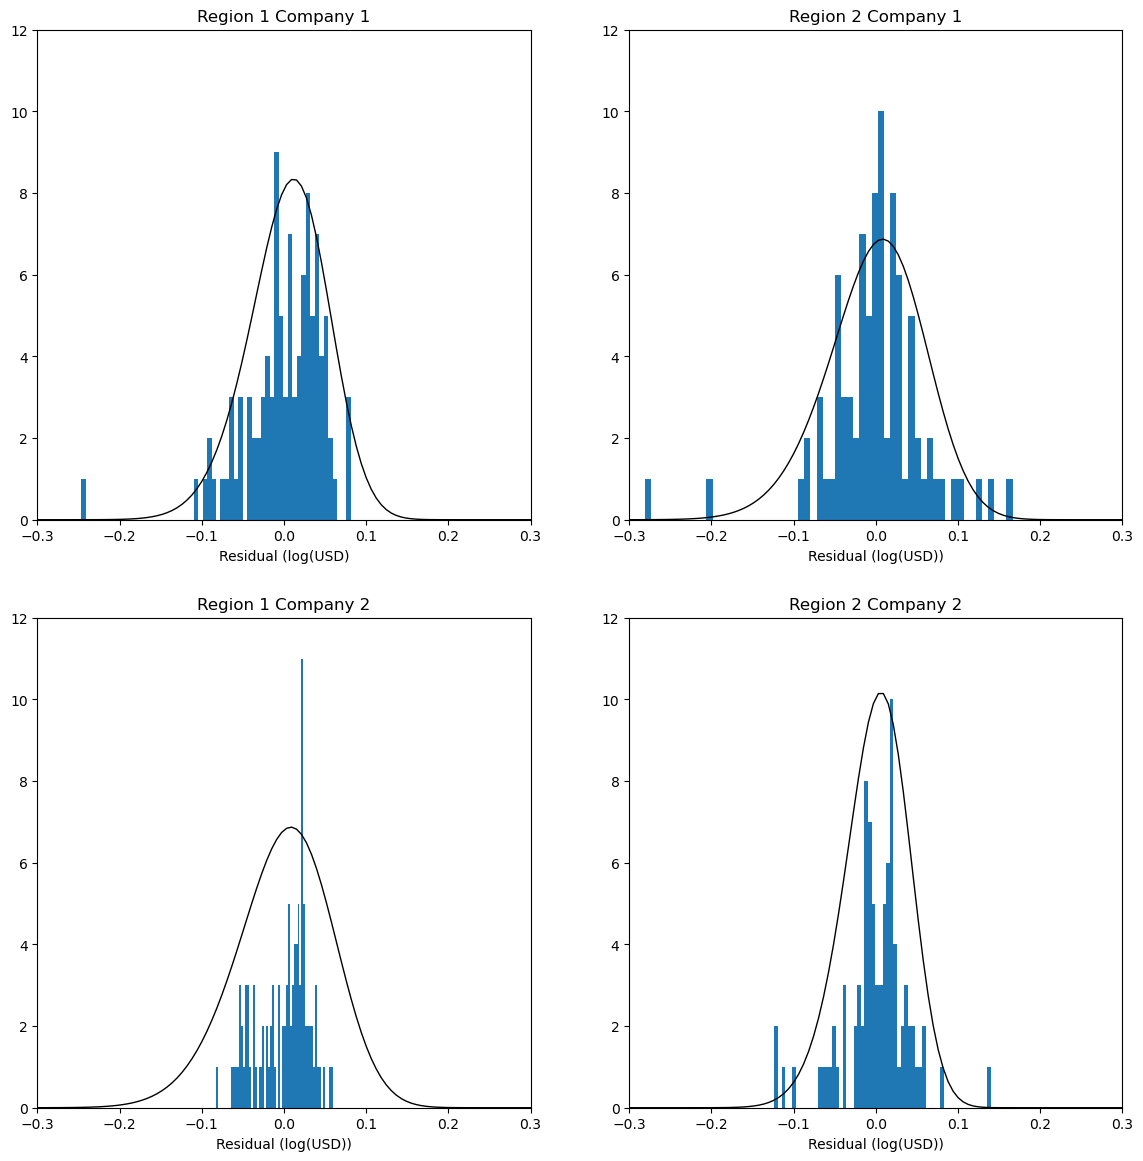

In [29]:
#plot of the histogram of the residuals with estimated distribution
fig, ((ax11, ax21),(ax12,ax22)) = plt.subplots(2, 2,figsize=(14,14))


#Company 1 Region 1
ax11.hist(r1_c1["res_log_Price_USD"], bins=60)
xmin11, xmax11 = ax11.set_xlim(-.3,.3)
x11 = np.linspace(xmin11, xmax11, 100)
p11 = scipy.stats.skewnorm.pdf(x11, a11, loc11, sc11)
ax11.plot(x11, p11, 'k', linewidth=1)
ax11.set_ylim(0,12)

ax11.set_title("Region 1 Company 1")
ax11.set_xlabel("Residual (log(USD)")


#Company 1 Region 2
ax21.hist(r2_c1["res_log_Price_USD"], bins=60)
xmin21, xmax21 = ax21.set_xlim(-.3,.3)
x21 = np.linspace(xmin21, xmax21, 100)
p21 = scipy.stats.skewnorm.pdf(x21,a21, loc21, sc21)
ax21.plot(x21, p21, 'k', linewidth=1)
ax21.set_ylim(0,12)

ax21.set_title("Region 2 Company 1")
ax21.set_xlabel("Residual (log(USD))")


#Company 2 Region 1
ax12.hist(r1_c2["res_log_Price_USD"], bins=60)
xmin12, xmax12 = ax12.set_xlim(-.3,.3)
x12 = np.linspace(xmin12, xmax12, 100)
p12 = scipy.stats.skewnorm.pdf(x12,a12, loc12, sc12)
ax12.plot(x21, p21, 'k', linewidth=1)
ax12.set_ylim(0,12)

ax12.set_title("Region 1 Company 2")
ax12.set_xlabel("Residual (log(USD))")


#Company 2 Region 2
ax22.hist(r2_c2["res_log_Price_USD"], bins=60)
xmin22, xmax22 = ax22.set_xlim(-.3,.3)
x22 = np.linspace(xmin22, xmax22, 100)
p22 = scipy.stats.skewnorm.pdf(x22, a22, loc22, sc22)
ax22.plot(x22, p22, 'k', linewidth=1)
ax22.set_ylim(0,12)

ax22.set_title("Region 2 Company 2")
ax22.set_xlabel("Residual (log(USD))")


plt.show()

We plot the confidence regions according around the regression curve according to the estimated parameters of the distribution.

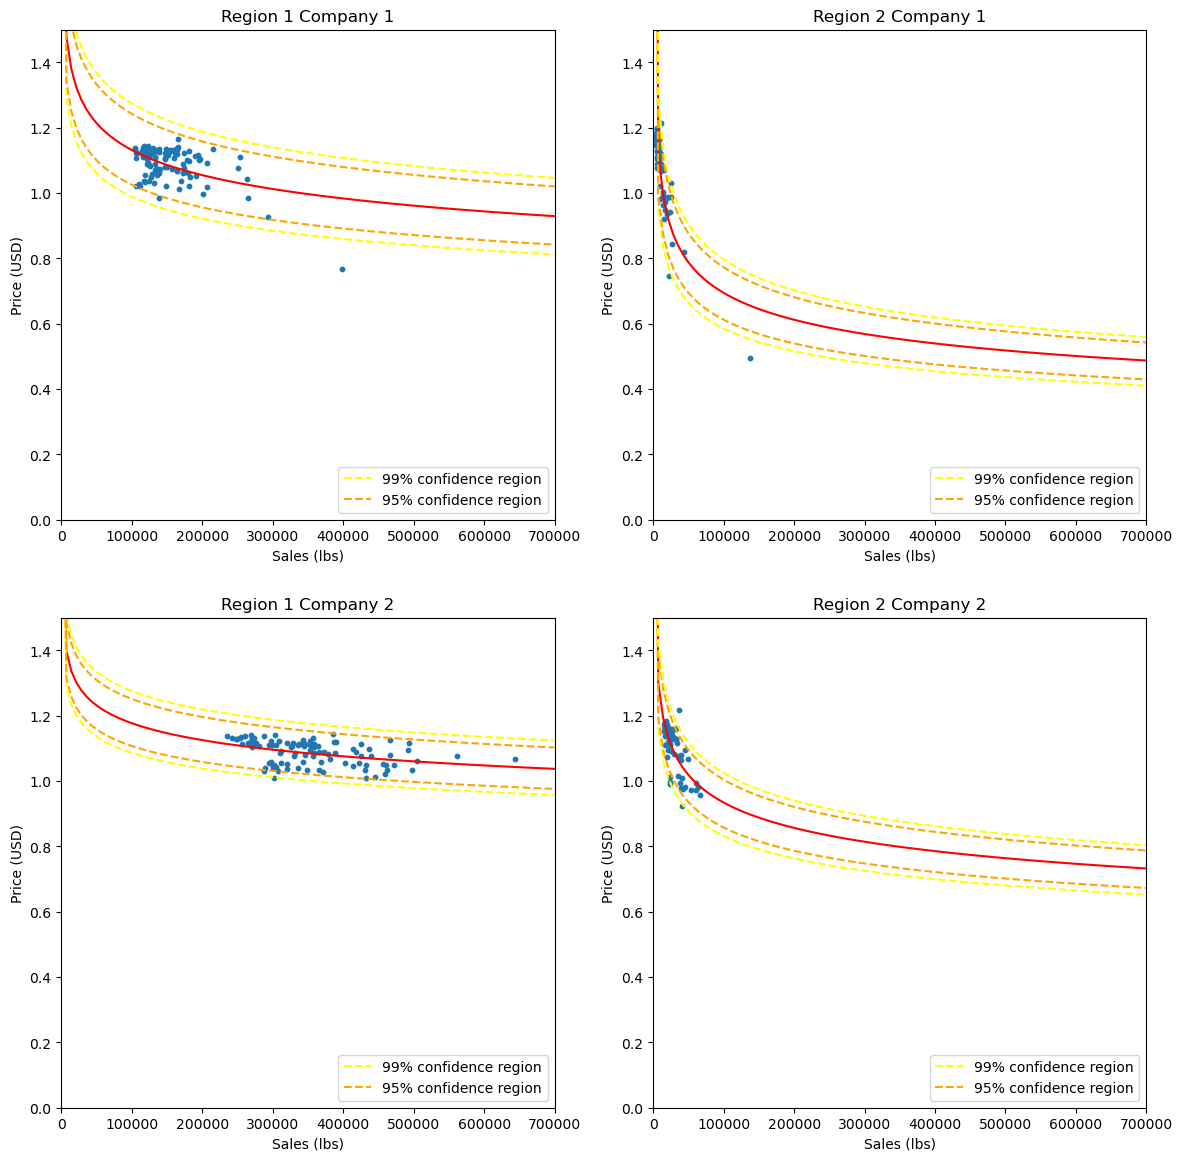

In [30]:
#estimation of the intervals of the confidence regions
e11_005 = scipy.stats.skewnorm.ppf(.005,a11, loc11, sc11)
e11_025 = scipy.stats.skewnorm.ppf(.025,a11, loc11, sc11)
e11_975 = scipy.stats.skewnorm.ppf(.975,a11, loc11, sc11)
e11_995 = scipy.stats.skewnorm.ppf(.995,a11, loc11, sc11)

e21_005 = scipy.stats.skewnorm.ppf(.005,a21, loc21, sc21)
e21_025 = scipy.stats.skewnorm.ppf(.025,a21, loc21, sc21)
e21_975 = scipy.stats.skewnorm.ppf(.975,a21, loc21, sc21)
e21_995 = scipy.stats.skewnorm.ppf(.995,a21, loc21, sc21)

e12_005 = scipy.stats.skewnorm.ppf(.005,a12, loc12, sc12)
e12_025 = scipy.stats.skewnorm.ppf(.025,a12, loc12, sc12)
e12_975 = scipy.stats.skewnorm.ppf(.975,a12, loc12, sc12)
e12_995 = scipy.stats.skewnorm.ppf(.995,a12, loc12, sc12)

e22_005 = scipy.stats.skewnorm.ppf(.005,a22, loc22, sc22)
e22_025 = scipy.stats.skewnorm.ppf(.025,a22, loc22, sc22)
e22_975 = scipy.stats.skewnorm.ppf(.975,a22, loc22, sc22)
e22_995 = scipy.stats.skewnorm.ppf(.995,a22, loc22, sc22)


#plot of the regression curve with confidence region
xseq = np.linspace(1, 700000, num=100)

fig, ((ax11, ax21),(ax12,ax22)) = plt.subplots(2, 2,figsize=(14,14))

#Company 1 Region 1
ax11.scatter(r1_c1["Sales_U"],r1_c1["Price_USD"],s=10)
ax11.plot(xseq, A11 * (xseq**(k11**(-1))) , color="red")
ax11.plot(xseq, A11 * (xseq**(k11**(-1)))* np.exp(e11_005) , label = "99% confidence region",color="yellow", linestyle="--")
ax11.plot(xseq, A11 * (xseq**(k11**(-1)))* np.exp(e11_025) , label = "95% confidence region",color="orange", linestyle="--")
ax11.plot(xseq, A11 * (xseq**(k11**(-1)))* np.exp(e11_975) , color="orange", linestyle="--")
ax11.plot(xseq, A11 * (xseq**(k11**(-1)))* np.exp(e11_995) , color="yellow", linestyle="--")

ax11.set_xlim(0,700000)
ax11.set_ylim(0,1.5)

ax11.set_title("Region 1 Company 1")
ax11.set_xlabel("Sales (lbs)")
ax11.set_ylabel("Price (USD)")
ax11.legend(loc="lower right")


#Company 1 Region 2
ax21.scatter(r2_c1["Sales_U"],r2_c1["Price_USD"],s=10)
ax21.plot(xseq, A21 * (xseq**(k21**(-1))) , color="red")
ax21.plot(xseq, A21 * (xseq**(k21**(-1)))* np.exp(e21_005), label = "99% confidence region", color="yellow", linestyle="--")
ax21.plot(xseq, A21 * (xseq**(k21**(-1)))* np.exp(e21_025), label = "95% confidence region" ,color="orange", linestyle="--")
ax21.plot(xseq, A21 * (xseq**(k21**(-1)))* np.exp(e21_975), color="orange", linestyle="--")
ax21.plot(xseq, A21 * (xseq**(k21**(-1)))* np.exp(e21_995), color="yellow", linestyle="--")

ax21.set_xlim(0,700000)
ax21.set_ylim(0,1.5)

ax21.set_title("Region 2 Company 1")
ax21.set_xlabel("Sales (lbs)")
ax21.set_ylabel("Price (USD)")
ax21.legend(loc="lower right")


#Company 2 Region 1 
ax12.scatter(r1_c2["Sales_U"],r1_c2["Price_USD"],s=10)
ax12.plot(xseq, A12 * (xseq**(k12**(-1))) , color="red")
ax12.plot(xseq, A12 * (xseq**(k12**(-1)))* np.exp(e12_005), label = "99% confidence region" ,color="yellow", linestyle="--")
ax12.plot(xseq, A12 * (xseq**(k12**(-1)))* np.exp(e12_025), label = "95% confidence region" ,color="orange", linestyle="--")
ax12.plot(xseq, A12 * (xseq**(k12**(-1)))* np.exp(e12_975), color="orange", linestyle="--")
ax12.plot(xseq, A12 * (xseq**(k12**(-1)))* np.exp(e12_995), color="yellow", linestyle="--")

ax12.set_xlim(0,700000)
ax12.set_ylim(0,1.5)

ax12.set_title("Region 1 Company 2")
ax12.set_xlabel("Sales (lbs)")
ax12.set_ylabel("Price (USD)")
ax12.legend(loc="lower right")


#Company 2 Region 2
ax22.scatter(r2_c2["Sales_U"],r2_c2["Price_USD"],s=10)
ax22.plot(xseq, A22 * (xseq**(k22**(-1))) , color="red")
ax22.plot(xseq, A22 * (xseq**(k22**(-1)))* np.exp(e22_005), label = "99% confidence region", color="yellow", linestyle="--")
ax22.plot(xseq, A22 * (xseq**(k22**(-1)))* np.exp(e22_025), label = "95% confidence region", color="orange", linestyle="--")
ax22.plot(xseq, A22 * (xseq**(k22**(-1)))* np.exp(e22_975), color="orange", linestyle="--")
ax22.plot(xseq, A22 * (xseq**(k22**(-1)))* np.exp(e22_995), color="yellow", linestyle="--")


ax22.set_xlim(0,700000)
ax22.set_ylim(0,1.5)

ax22.set_title("Region 2 Company 2")
ax22.set_xlabel("Sales (lbs)")
ax22.set_ylabel("Price (USD)")
ax22.legend(loc="lower right")

plt.show()

The model fits well in the 99% and 95% confidence region in all cases and its more solid at Company 2. 

Two points are out of the 99% confidence region in Company 1, one at Region 1 and other at Region 2. This suggests high volatility under big sales scenarios, it would be interesting to get more information about the nature of those atypical events, for discarding or accepting this hypothesis.